# MAX-CUT for QAOA
***
## Undirected Unweighted MAX-CUT:
***
The toolkit provides predefined examples for users so that the entire process of QAOA can be conducted easily within 2 functions. In the first example, we will look at undirected and unweighted; for all edges $e, w_e = 1$ and the hamiltonian can be expressed as  $H_f = \frac{1}{2}(I - \sigma^z_u \sigma^z_v)$, which also the same as our predefined objective function : ~$x_u$ & $x_v$ | $x_u$ & ~$x_v$ We just have to import the max_cut package from the predefined examples folder:

In [1]:
# import the predefined library
import os 
os.path.abspath(os.curdir)
os.path.sys.path.append('../predefined_problems/')

import max_cut as mc

 For MAX-CUT, we have to generate a graph, in this case a butterfly graph would suffice:

/home/anand/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


{(0, 1): Text(0.654508480212244, 0.4755283023511464, '1.0'),
 (0, 2): Text(0.09549145273252935, 0.2938926212887637, '1.0'),
 (1, 2): Text(-0.2500000670552266, 0.7694208997980517, '1.0'),
 (2, 3): Text(-0.8090170349302954, -6.55651103964594e-08, '1.0'),
 (2, 4): Text(-0.24999999254941926, -0.18163562741820138, '1.0'),
 (3, 4): Text(-0.24999993294477343, -0.7694209117189807, '1.0')}

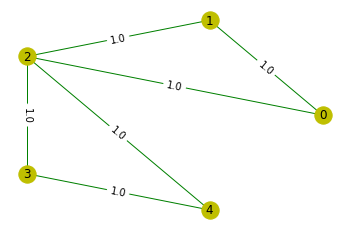

In [2]:
# Create a graph for the problem its is also adviseable to instantiate the weight of the graphs else it 
# be defaulted to 1
import networkx as nx 
import numpy as np
import matplotlib.pyplot as plt 
from   matplotlib import cm
from   matplotlib.ticker import LinearLocator, FormatStrFormatter

n     = 5
V     = np.arange(0,n,1)
E     =[(0,1,1.0),(0,2,1.0),(1,2,1.0),(3,2,1.0),(3,4,1.0),(4,2,1.0)] 

G     = nx.Graph()
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

fig = plt.figure()
ax1 = plt.subplot2grid((1, 1), (0, 0))
labels = nx.get_edge_attributes(G,'weight')

nx.draw(G,with_labels=True, pos=nx.circular_layout(G), node_color='y', edge_color='g')
nx.draw_networkx_edge_labels(G,nx.circular_layout(G),edge_labels=labels)

The next step is to instantiate the max_cut object. For the max-cut problem; we defined the objective function $f(x)$ = $x_1 \oplus x_2$ = $\neg x_1 \wedge x_2$ | $\neg x_2 \wedge x_1$

In [3]:
# instantiate a MAX_CUT object which prepares converts the objective function into a pauli hamiltonian
max_cut = mc.max_cut(1,G)

The user also have an option of generating the quantum circuit to view the circuit layout, Users also have to delcare hyperparameters:

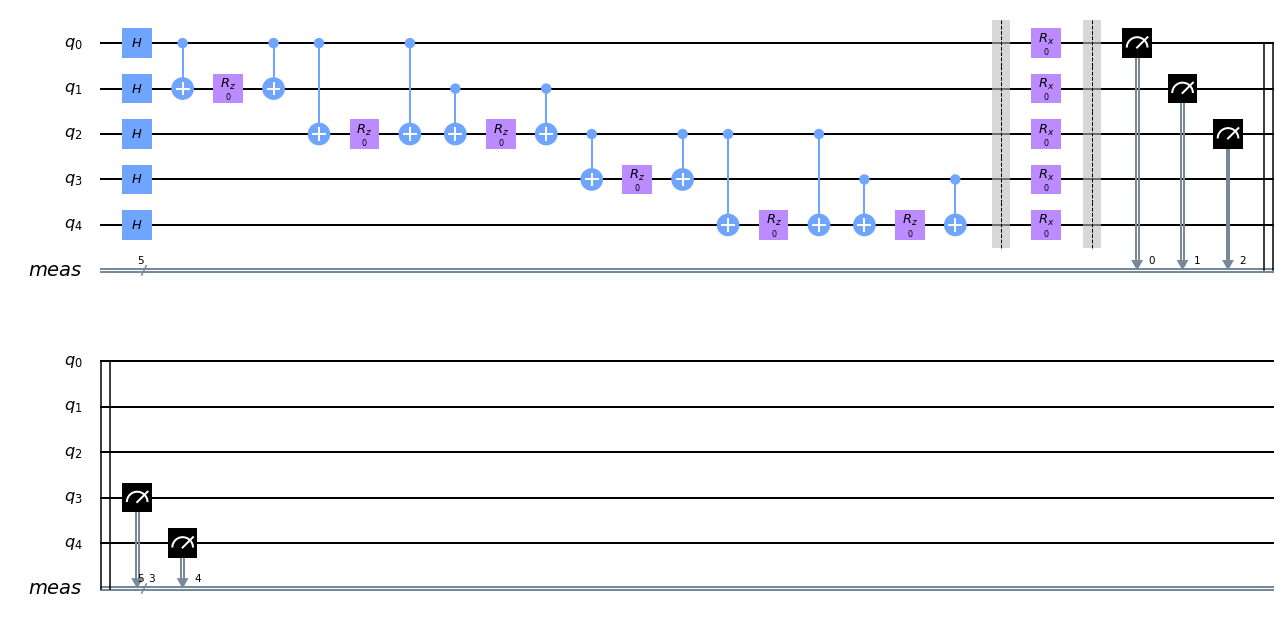

In [4]:
# Generate the circuit for graph per Edge mapping
hyperparams = [0.0,0.0]
max_cut.generate_quantumCircuit(G, hyperparams)

After generation of the circuit, users can run the ciruit once using **run_circuit()** to get the expectation values using Scipy's optimization algorithms to reduce the expectation value, this function was created so that users can run the circuit once after getting the optimal hyperparameters:

In [5]:
# run the circuit once 
results = max_cut.run_circuit()

backend setup: Complete running circuit
Simulation: Complete!
Expectation Value : 3.009765625


User can call **run_QAOA()** function to run  the entire process of QAOA algorithm to obtain the highest expectation value of the problem graph. The function uses scipy.opt to optimize the hyperparameters, thus, users can choose their preferred optimizer:

In [6]:
hyperparams=[np.pi,np.pi]
opt_hyperparams = max_cut.run_QAOA(hyperparams,'COBYLA')

     fun: -3.001953125
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 24
  status: 1
 success: True
       x: array([3.13756237, 3.14060038])


In [7]:
hyperparams=[3.7838252 , -0.50908655]
max_cut.generate_quantumCircuit(G, hyperparams)
res = max_cut.run_circuit()

backend setup: Complete running circuit
Simulation: Complete!
Expectation Value : 3.873046875


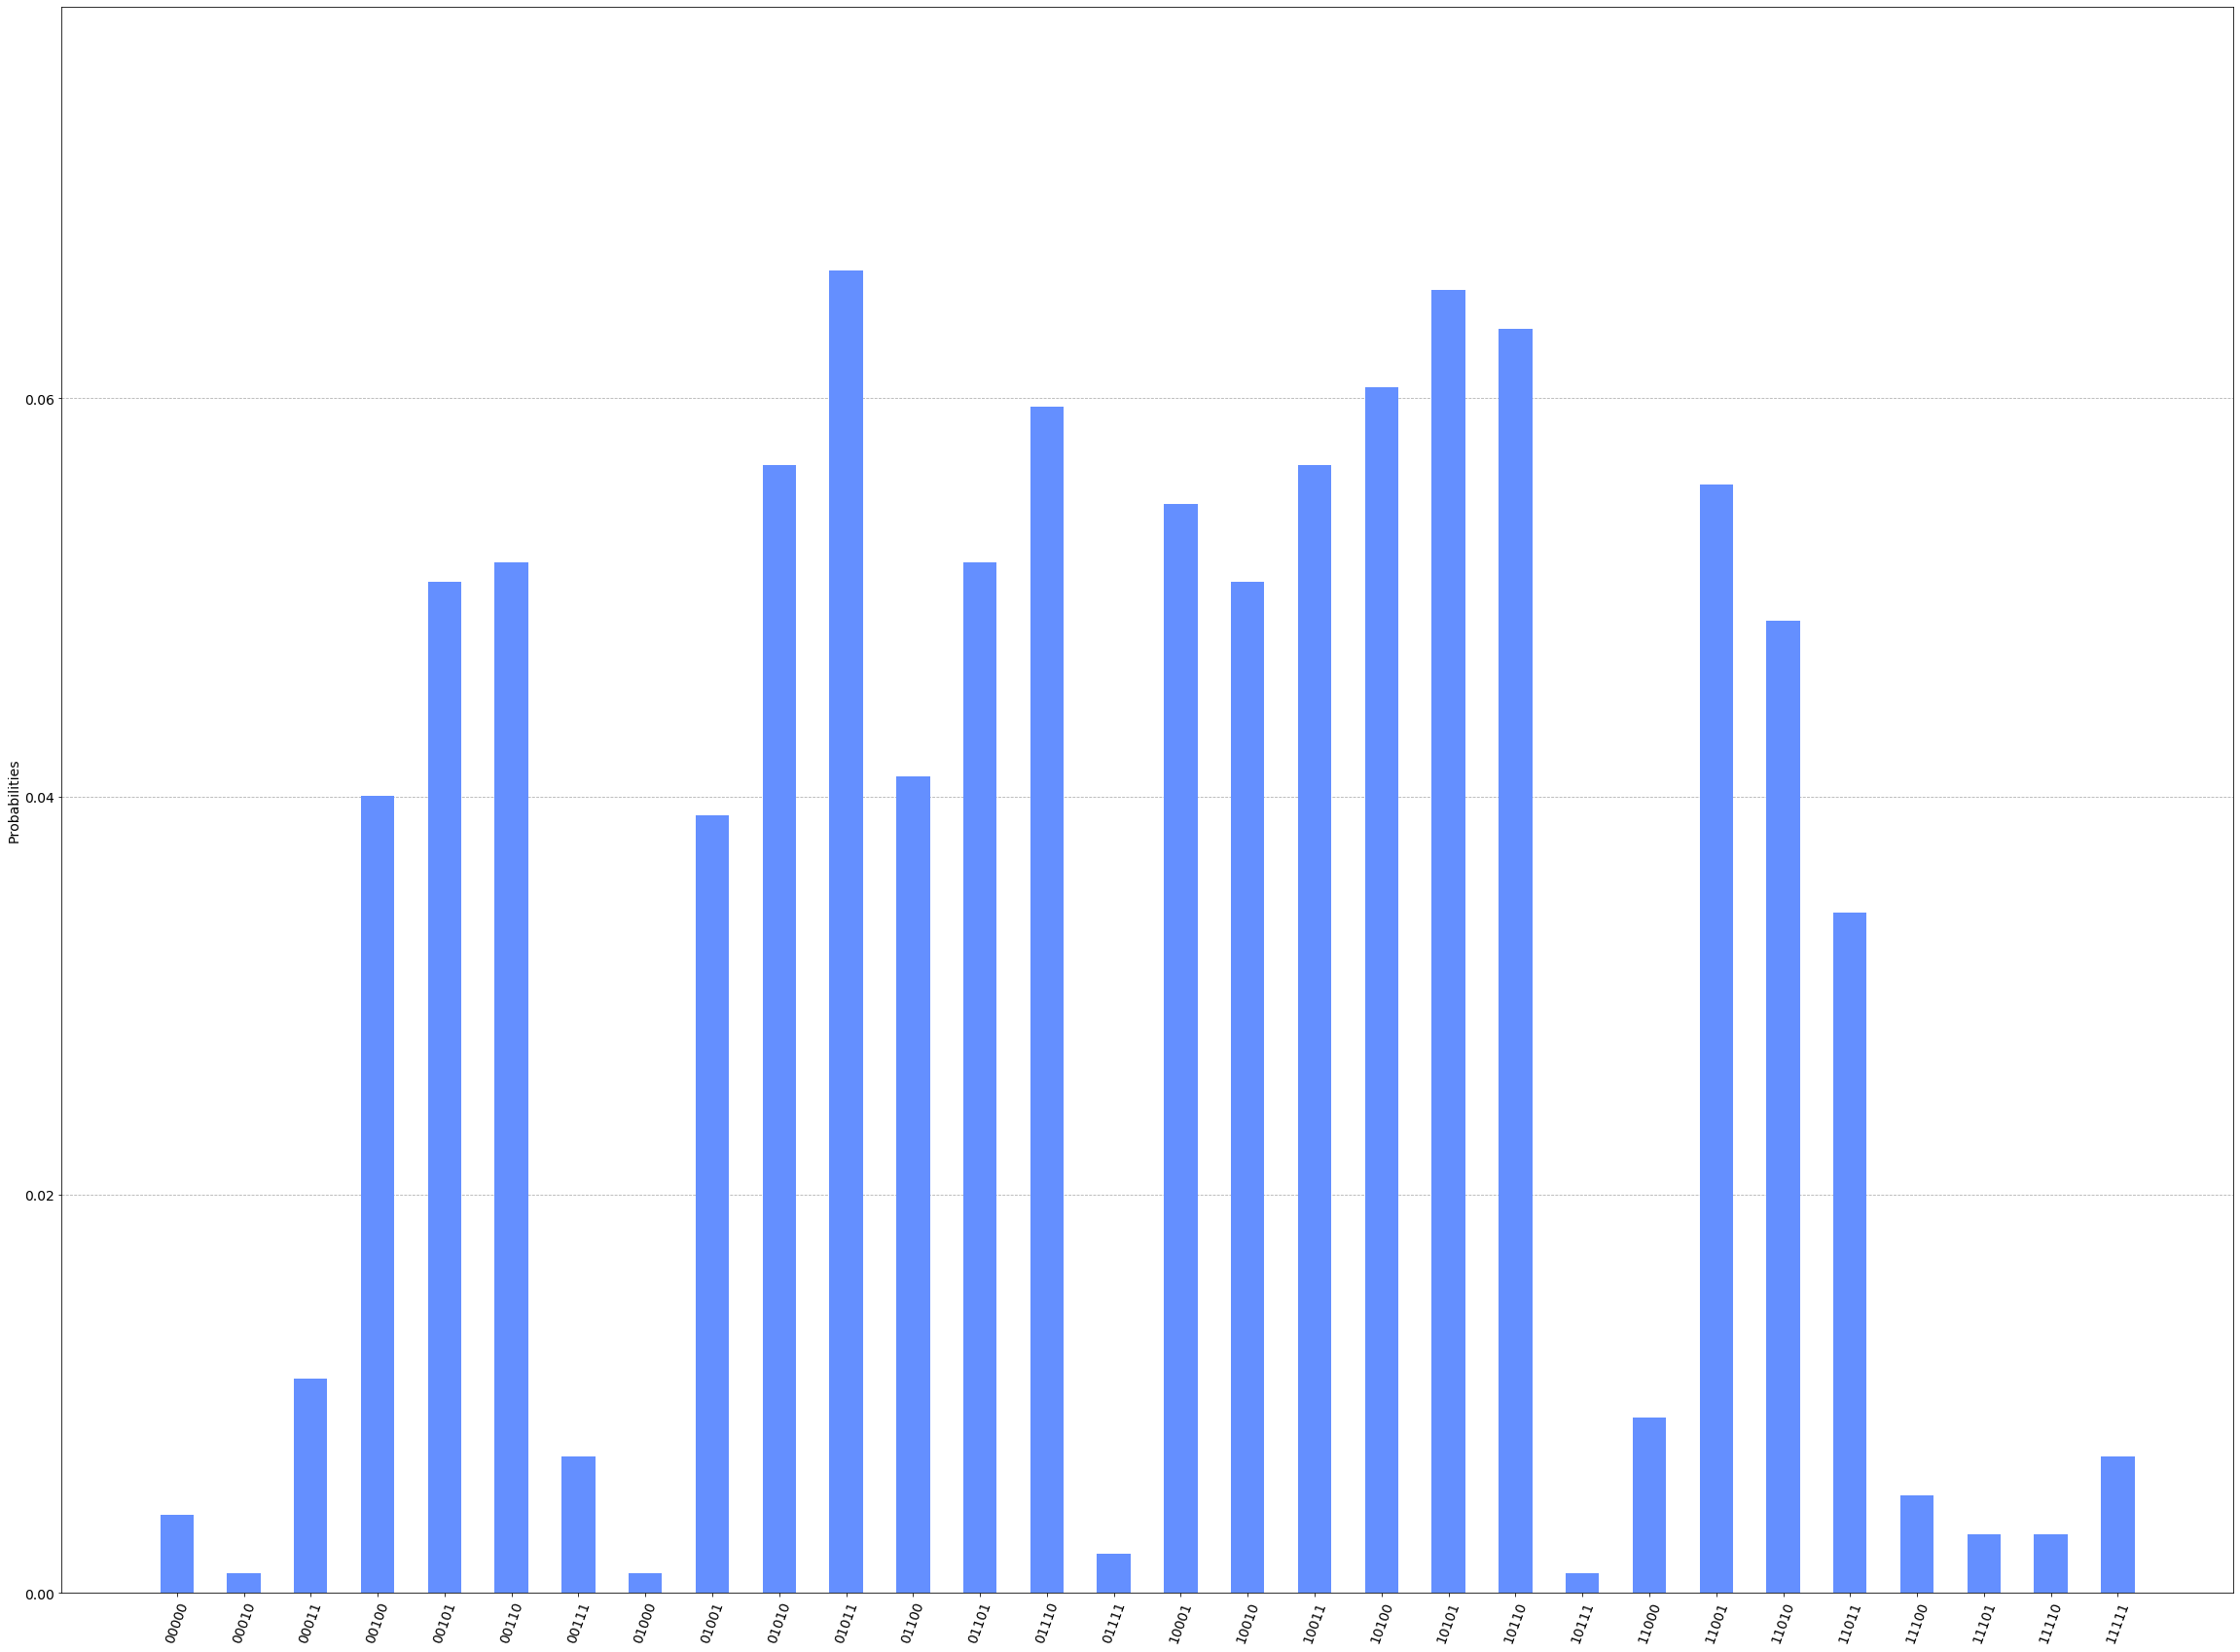

In [8]:
from qiskit.visualization import plot_histogram
plot_histogram(res.get_counts(),figsize = (40,30),bar_labels = False)

## Weighted Undirected MAX-CUT:
***
The **max_cut** package also allows for weighted edges to included into the graph. The Objective function remains the same as the previous example. So we can use the same graph but this time with weights and repeat the same process:

{(0, 1): Text(0.654508480212244, 0.4755283023511464, '6.0'),
 (0, 2): Text(0.09549145273252935, 0.2938926212887637, '7.0'),
 (1, 2): Text(-0.2500000670552266, 0.7694208997980517, '8.0'),
 (2, 3): Text(-0.8090170349302954, -6.55651103964594e-08, '9.0'),
 (2, 4): Text(-0.24999999254941926, -0.18163562741820138, '4.0'),
 (3, 4): Text(-0.24999993294477343, -0.7694209117189807, '10.0')}

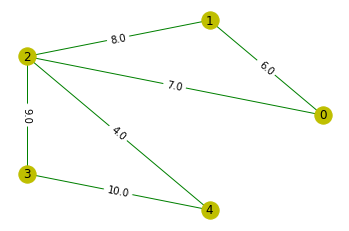

In [9]:
n     = 5
V     = np.arange(0,n,1)
E     =[(0,1,6.0),(0,2,7.0),(1,2,8.0),(3,2,9.0),(3,4,10.0),(4,2,4.0)] 

G     = nx.Graph()
G.add_nodes_from(V)
G.add_weighted_edges_from(E)


labels = nx.get_edge_attributes(G,'weight')

fig = plt.figure()
ax1 = plt.subplot2grid((1, 1), (0, 0))
labels = nx.get_edge_attributes(G,'weight')

nx.draw(G,with_labels=True, pos=nx.circular_layout(G), node_color='y', edge_color='g')
nx.draw_networkx_edge_labels(G,nx.circular_layout(G),edge_labels=labels)

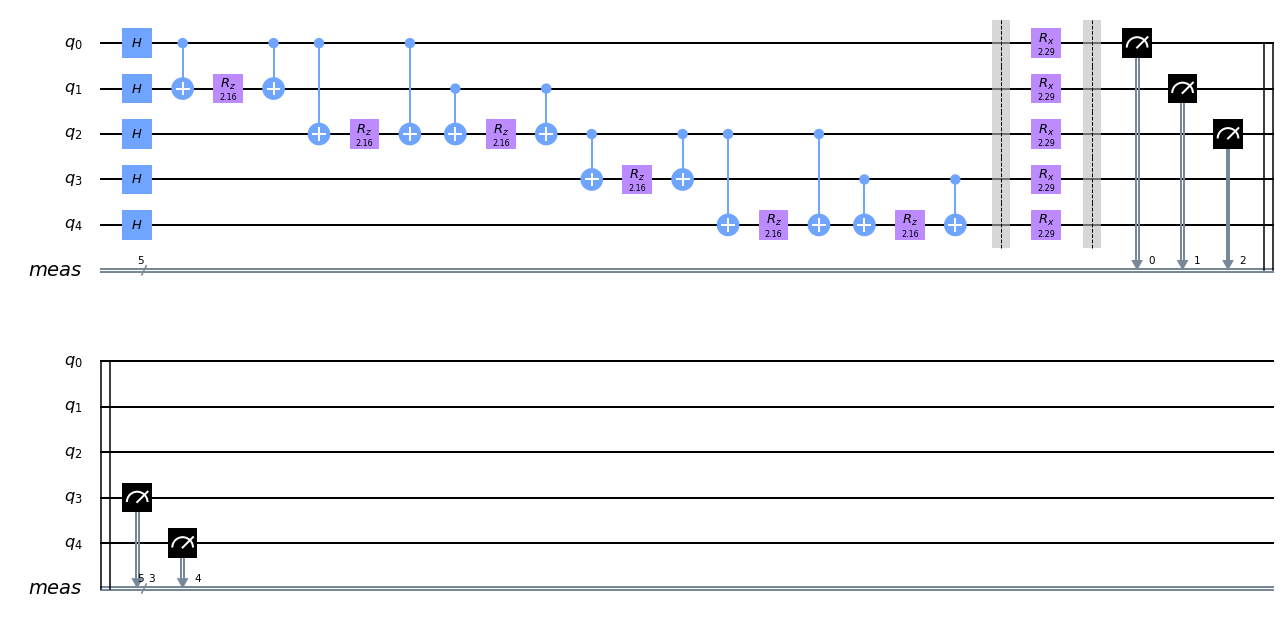

In [10]:
# instantiate a MAX_CUT object which prepares converts the objective function into a Pauli Hamiltonian
shots = 1024
hyperparams=[2.16149434, 2.285357185 ]
max_cutWeights = mc.max_cut(1, G, shots=shots)
max_cutWeights.generate_quantumCircuit(G, hyperparams)

The process is entirely the same as the examples without weights:

In [11]:
opt_hyperparams = max_cutWeights.run_QAOA(hyperparams,'COBYLA')

     fun: -28.927734375
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 30
  status: 1
 success: True
       x: array([3.71903039, 2.51828432])


In [12]:
max_cutWeights.generate_quantumCircuit(G, opt_hyperparams)
res = max_cutWeights.run_circuit()

backend setup: Complete running circuit
Simulation: Complete!
Expectation Value : 28.6728515625


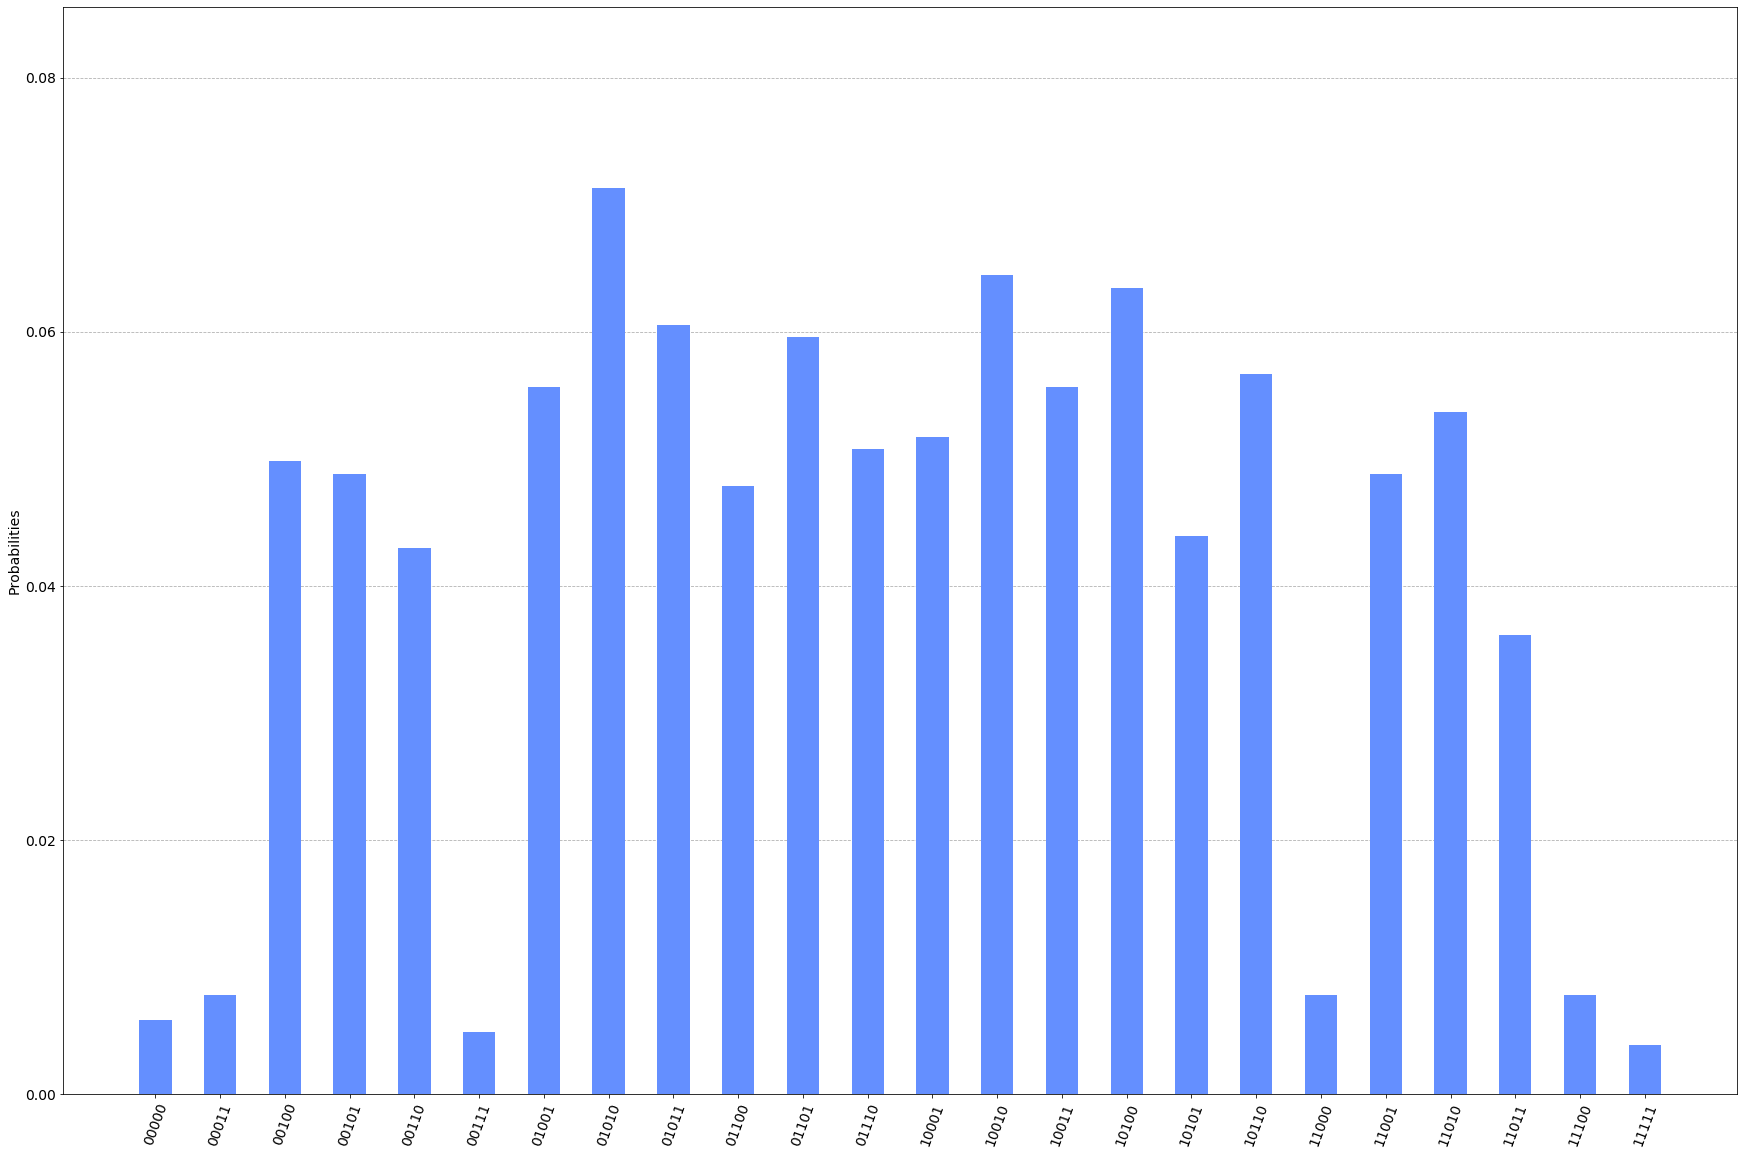

In [13]:
from qiskit.visualization import plot_histogram
plot_histogram(res.get_counts(),figsize = (30,20),bar_labels = False)

## Directed Weighted MAX-CUT:

 The Objective function for directed MAX-CUT is defined as  $\neg x_u $ & $ x_v$ , meaning only edges leaving the set of vertices in set "0" -> "1" are included into the expectation value. However the user only need to specify that the edges are directed when instantiating the max_cut object by setting _directed_= True:

/home/anand/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


{(0, 1): Text(0.654508480212244, 0.4755283023511464, '6.0'),
 (1, 2): Text(-0.2500000670552266, 0.7694208997980517, '8.0'),
 (2, 0): Text(0.09549145273252935, 0.2938926212887637, '7.0'),
 (3, 2): Text(-0.8090170349302954, -6.55651103964594e-08, '9.0'),
 (3, 4): Text(-0.24999993294477343, -0.7694209117189807, '10.0'),
 (4, 2): Text(-0.24999999254941926, -0.18163562741820138, '4.0')}

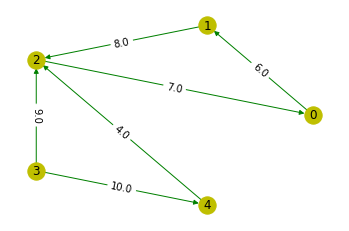

In [14]:
G = nx.DiGraph()
n     = 5
V     = np.arange(0,n,1)
E     =[(0,1,6.0),(2,0,7.0),(1,2,8.0),(3,2,9.0),(3,4,10.0),(4,2,4.0)] 

G.add_nodes_from(V)
G.add_weighted_edges_from(E)

fig = plt.figure()
ax1 = plt.subplot2grid((1, 1), (0, 0))
labels = nx.get_edge_attributes(G,'weight')

nx.draw(G,with_labels=True, pos=nx.circular_layout(G), node_color='y', edge_color='g')
nx.draw_networkx_edge_labels(G,nx.circular_layout(G),edge_labels=labels)

Since the objective function is  $\neg x_u $ & $ x_v$ ,the expression expands out with single pauli $Z$ gates and pauli $ZZ$ expressions:

**QUESTION**:
1. Do single pauli z need to be included in the expression?
2. Do the single pauli z need a sperate set of hyperparameters?

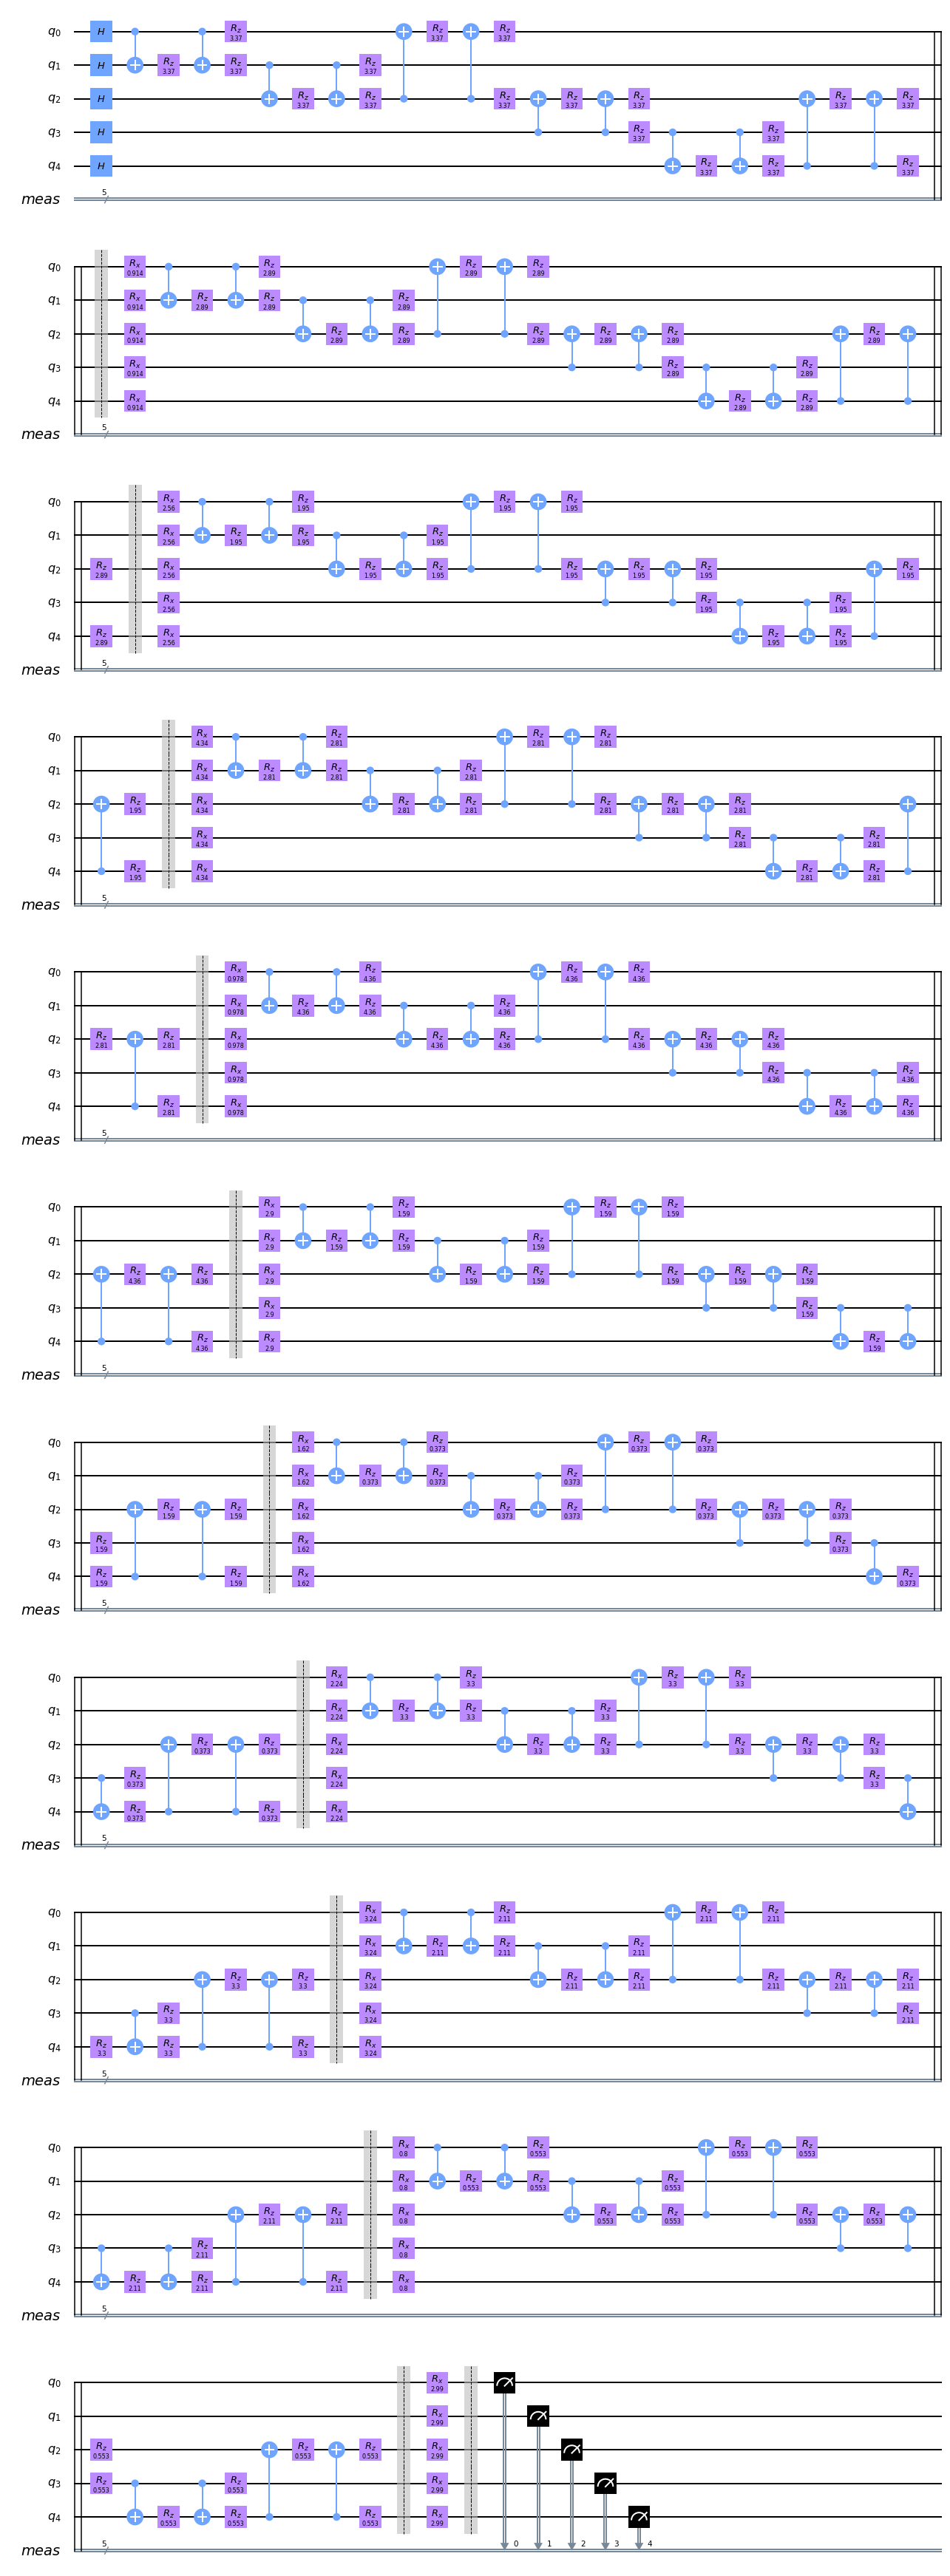

In [15]:
# instantiate a MAX_CUT object which prepares converts the objective function into a pauli hamiltonian
shots = 1024
hyperparams =[3.36568612, 2.89353376, 1.94995502, 2.81066211, 4.35598113,
       1.59481398, 0.37270972, 3.29721868, 2.10966901, 0.55292235,
       0.91366317, 2.55784585, 4.33938495, 0.97758835, 2.90043658,
       1.61500745, 2.23725913, 3.24234063, 0.80018804, 2.99461698]
max_cutWeights = mc.max_cut(10, G, shots=shots, directed=True)
max_cutWeights.generate_quantumCircuit(G, hyperparams)

In [16]:
opt_hyperparams = max_cutWeights.run_QAOA(hyperparams,'COBYLA')

     fun: -16.3994140625
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 158
  status: 1
 success: True
       x: array([3.39119245, 3.04641154, 1.98572299, 3.9196795 , 5.49181985,
       1.52009363, 0.80431005, 3.48747048, 3.01106531, 1.82288871,
       0.85217068, 2.70840959, 4.6611912 , 0.89369104, 2.69768776,
       1.41582455, 2.39587027, 3.44876956, 0.48471091, 3.14962059])


In [17]:
max_cutWeights.generate_quantumCircuit(G, opt_hyperparams)
res = max_cutWeights.run_circuit()

backend setup: Complete running circuit
Simulation: Complete!
Expectation Value : 16.990234375


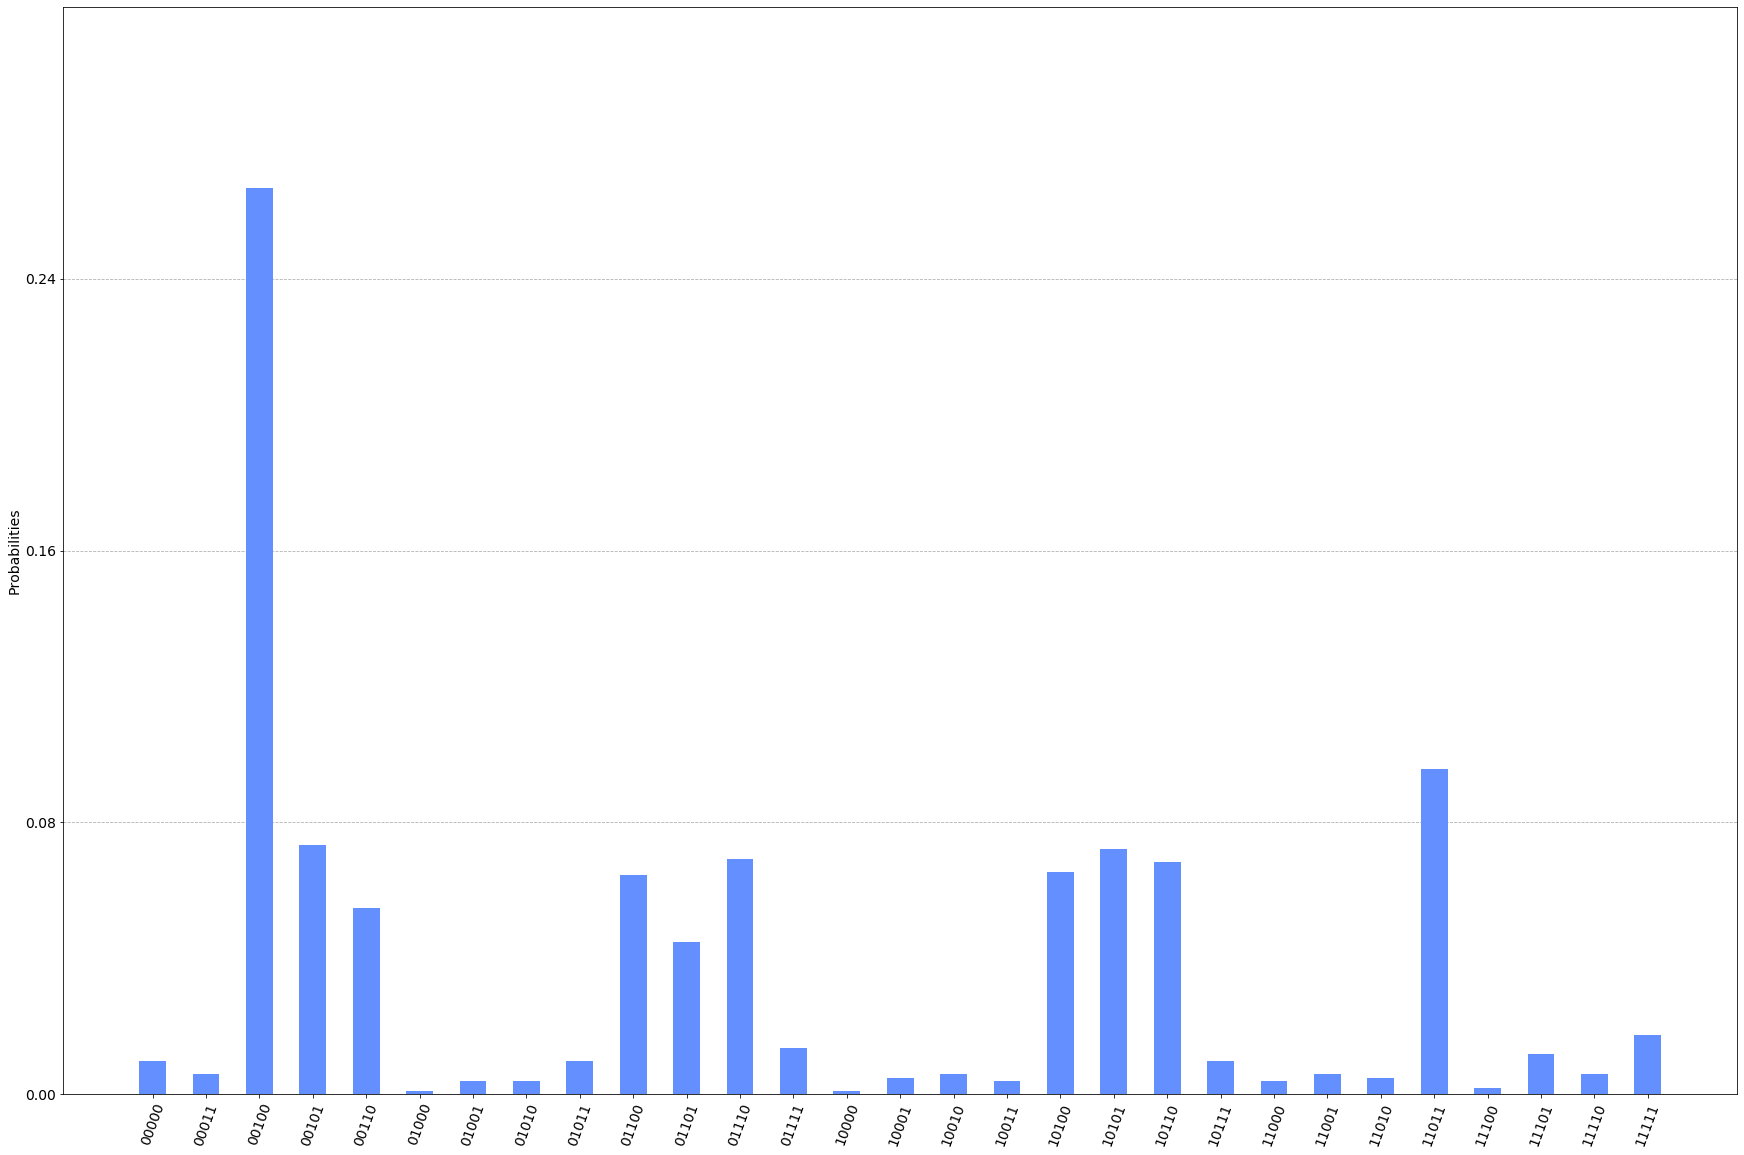

In [18]:
from qiskit.visualization import plot_histogram
plot_histogram(res.get_counts(),figsize = (30,20),bar_labels = False)

The MAX-CUT has more than enough examples online, and the next part will be on the issues with **Controlled Hamiltonians** >>>

{(0, 1): Text(0.654508480212244, 0.4755283023511464, '1.0'),
 (0, 4): Text(0.6545085547180512, -0.4755282248651067, '1.0'),
 (1, 2): Text(-0.2500000670552266, 0.7694208997980517, '1.0'),
 (2, 3): Text(-0.8090170349302954, -6.55651103964594e-08, '1.0'),
 (3, 4): Text(-0.24999993294477343, -0.7694209117189807, '1.0')}

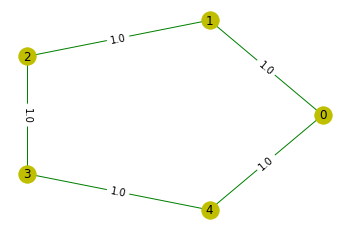

In [19]:
n     = 5
V     = np.arange(0,n,1)
E     =[(0,1,1.0),(1,2,1.0),(2,3,1.0), (3,4,1.0), (0,4,1.0)] 

G     = nx.Graph()
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

fig = plt.figure()
ax1 = plt.subplot2grid((1, 1), (0, 0))
labels = nx.get_edge_attributes(G,'weight')

nx.draw(G,with_labels=True, pos=nx.circular_layout(G), node_color='y', edge_color='g')
nx.draw_networkx_edge_labels(G,nx.circular_layout(G),edge_labels=labels)

In [20]:
import skeletor as sk
import numpy as np

obj1 = 'x_1 '
v1 = ['x_1']

hamiltonian = sk.skeletor(1, obj1, v1, False,graph=G)

hamiltonian.get_objFun()

.


x_1

In [21]:
hamiltonian.get_pHamil()

0.5*I - 0.5*Z_1

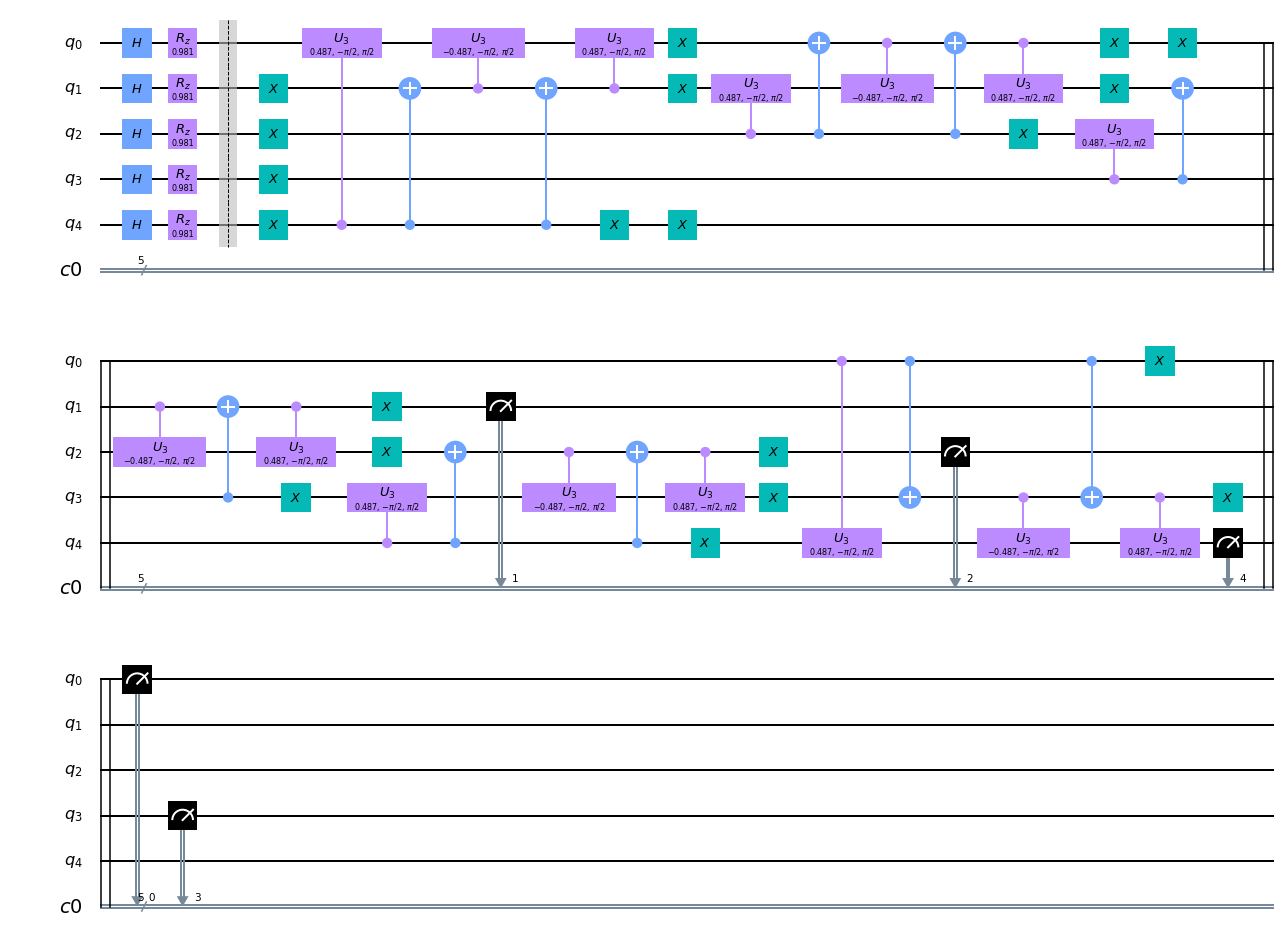

In [22]:
hyperparams = [0.98139345, 0.97441032]
hamiltonian.generate_quantumCircuit(hyperparams=hyperparams)

In [23]:
print(hamiltonian.phse_ham.get_qubitMap(), hamiltonian.circuit.depth())
opt_param = hamiltonian.run_QAOA(hyperparams,'COBYLA')

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4} 31
     fun: -2.8720703125
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 27
  status: 1
 success: True
       x: array([4.67668319, 0.98152446])


In [24]:
hamiltonian.generate_quantumCircuit(opt_param)
res = hamiltonian.run_circuit()

backend setup: Complete running circuit
Simulation: Complete!
Expectation Value : 2.8056640625


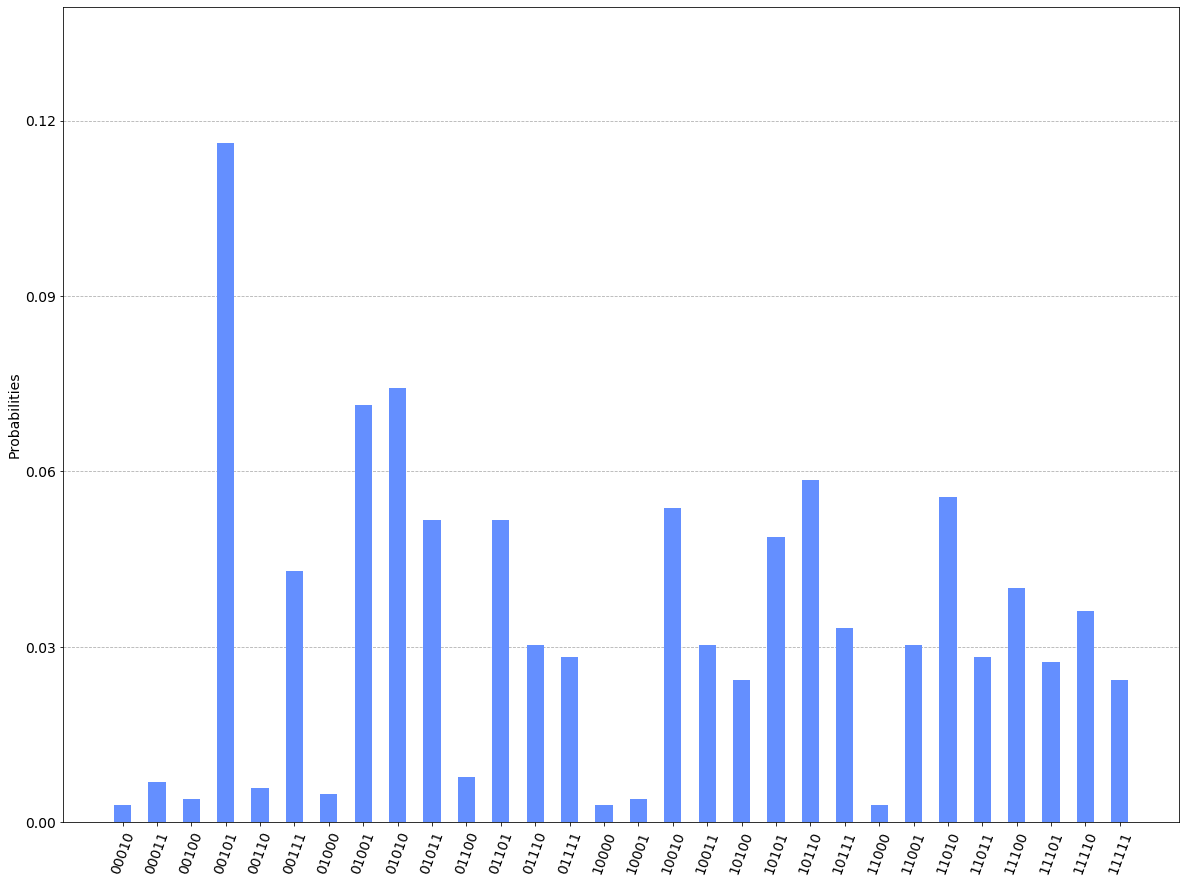

In [25]:
from qiskit.visualization import plot_histogram
plot_histogram(res.get_counts(),figsize = (20,15),bar_labels = False)